# Aproximación de enlace fuerte

Siempre pretendemos resolver

$$ \hat{H} | \psi \rangle = E | \psi \rangle $$

La función de onda la escribimos como una combinación de orbitales atómicos para el carbono, $s_p^3$, $s$. $p_x$, $p_y$, $p_z$.

$$ \psi = \sum_{i=1}^{n} c_i \phi (\vec{r} - R_i) $$

donde n es el número de átomos que tengo,

$$ \sum_{i}^{n} c_i \hat{H} \phi ( \vec{r} - \vec{R}_i) = E \sum_{i=1}^{n} c_i \phi_i (\vec{r} - \vec{R}_i) $$

Multiplicamos a izquierda por $\phi^{*} (\vec{r} - \vec{R}_j)$ e integramos en todo el espacio:

$$ \sum_{i=1}^{n} c_i \int \phi^{*}_j(\vec{r}-\vec{R}_j)  \hat{H} \phi(\vec{r}-\vec{R}_i) d\vec{r} = E \sum_{i=1}^{n} c_i \int \phi^{*} (\vec{r}-\vec{R}_j) \phi(\vec{r}-\vec{R}_i) d\vec{r}$$

Los orbitales atómicos son ortonormales entre sí

$$ \int \phi^{*} (\vec{r} - \vec{R}_j) \phi((\vec{r} - \vec{R}_j) d\vec{r} = \delta_{ij}$$

$$ \sum_{i=1} c_i \int \phi^{*} (\vec{r} - \vec{R}_j) \hat{H} \phi(\vec{r} - \vec{R}_i) d\vec{r} = E c_j $$

Aoproximación:

1 a primeros vecinos:

$$ C_1 t + C_5 t = E C_0 $$
$$ C_0 t + C_2 t = E C_1 $$
$$ C_1 t + C_3 t = E C_2 $$
$$ C_2 t + C_4 t = E C_3 $$
$$ C_3 t + C_5 t = E C_4 $$
$$ C_0 t + C_4 t = E C_5 $$

$$ \left( \begin{matrix}
0 && t && 0 && 0 && 0 && t \\
t && 0 && t && 0 && 0 && 0 \\
0 && t && 0 && t && 0 && 0 \\
0 && 0 && t && 0 && t && 0 \\
0 && 0 && 0 && t && 0 && t \\
t && 0 && 0 && 0 && t && 0 \\
\end{matrix}  \right) \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) = E \left( \begin{matrix} c_0 \\ c_1 \\ c_2 \\ c_3 \\ c_4 \\ c_5 \\ \end{matrix} \right) $$


Los valores de t, los podemos determinar desde experimentos desde otros cálculos. Dado el valor de t determinar E.

t = -2.7

In [1]:
# Importando paquetes
import pandas as pd
import numpy as np

# Funcion que lee un archivo y genera un vector de atomos
# y coordenadas.
def readfile(archivo):
    file = open(archivo, "r")
    lines = file.readlines()
    atom=[]
    coords=[]
    for line in lines[2:]:
        A, x, y, z = line.split()
        coords.append([x,y,z])
        atom.append(A)
    coords = np.array(coords, dtype=float)
    file.close()
    return atom,coords

# Funcion que genera una matriz de distancias entre los Carbonos.
def getMatrizDistancias(atom,coords):
    C = pd.DataFrame(coords, columns=['x', 'y', 'z'], index=atom)
    Cs = C[C.index=='C'] 
    X1, X2 = np.meshgrid(Cs.x,Cs.x)
    Y1, Y2 = np.meshgrid(Cs.y,Cs.y)
    Z1, Z2 = np.meshgrid(Cs.z,Cs.z)
    D = np.sqrt((X2-X1)**2+(Y2-Y1)**2+(Z2-Z1)**2)
    return D

def getT(file, t):
    atom, coords = readfile(file)
    D = getMatrizDistancias(atom, coords)
    np.fill_diagonal(D, 1000)
    D = pd.DataFrame(D) 
    Dmin = np.min(D)
    D[D>round(Dmin,2)]=0.
    D[D>0.]=t
    return np.array(D)

t = -2.7
T = getT('benzene.xyz', t)
E, eigvec = np.linalg.eig(T)
np.sort(E)

array([-5.4, -2.7, -2.7,  2.7,  2.7,  5.4])

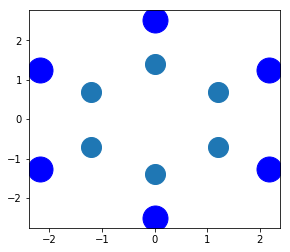

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
a, coor = readfile('benzene.xyz')
C = pd.DataFrame(coor, columns=['x', 'y', 'z'], index=a)
Cs = C[C.index=='C'] 
Hs = C[C.index=='H'] 
plt.figure(figsize=(4.5,4))
plt.plot(Cs.x, Cs.y, 'o', ms=20)
plt.plot(Hs.x, Hs.y, 'o', c='blue', ms=25)